**Check Point Stock Prediction Using fbprophet By Facebook**

In [150]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [151]:
m = Prophet(weekly_seasonality=False,yearly_seasonality=False, daily_seasonality=True)

In [152]:
df = pd.read_csv('C:/Users/jonathanbe/Downloads/CHKP.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,32.583332,33.937500,32.166668,33.125000,33.125000,668400
1,2000-01-03,34.166668,36.416668,32.000000,36.416668,36.416668,3205200
2,2000-01-04,35.458332,36.312500,32.333332,33.125000,33.125000,3248400
3,2000-01-05,32.833332,33.479168,31.000000,32.791668,32.791668,4746000
4,2000-01-06,31.916666,32.583332,29.083334,30.539063,30.539063,3370200


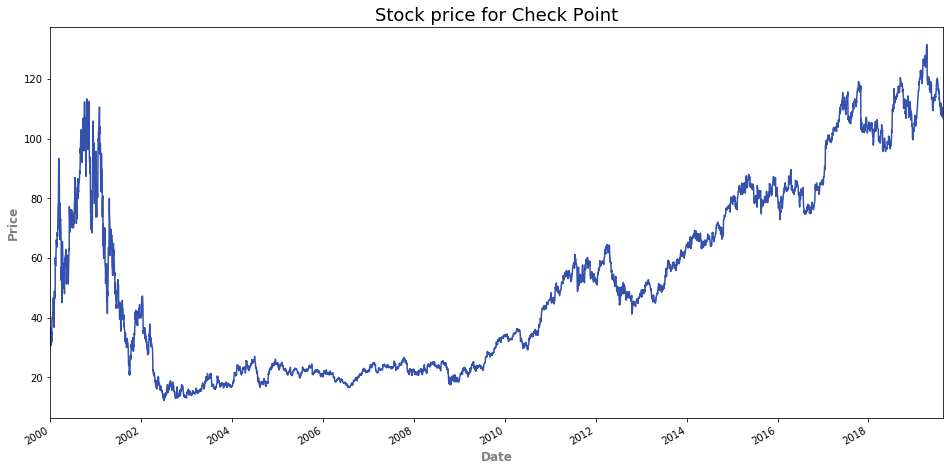

In [153]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df['Adj Close'].plot(figsize=(16,8),color='#002699',alpha=0.8)
plt.xlabel("Date",fontsize=12,fontweight='bold',color='gray')
plt.ylabel('Price',fontsize=12,fontweight='bold',color='gray')
plt.title("Stock price for Check Point",fontsize=18)
plt.show()

In [154]:
df.columns = ['ds','Open','High',
                     'Low','Close','y','Volume']
m.fit(df)

C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3.0\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [155]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,1999-12-31,43.133641,35.209486,50.759977
1,2000-01-03,43.788689,36.422140,51.812352
2,2000-01-04,44.007038,36.694011,51.141221
3,2000-01-05,44.225387,37.226904,51.352249
4,2000-01-06,44.443736,37.052325,51.822945


In [156]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
5303,2020-08-18,129.753915,116.952767,141.707767
5304,2020-08-19,129.781316,117.237000,142.367856
5305,2020-08-20,129.808718,116.980350,142.003961
5306,2020-08-21,129.836120,117.300162,141.128365
5307,2020-08-22,129.863522,117.202483,143.288303


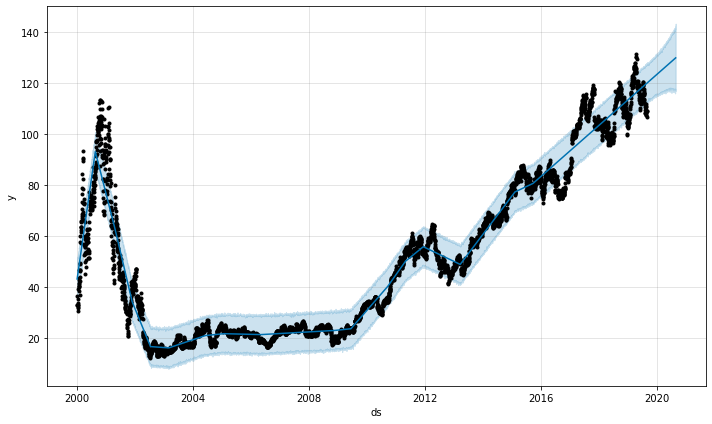

In [157]:
#We plot our actual predicion compared to the actual adjusted closing price
fig1 = m.plot(forecast)

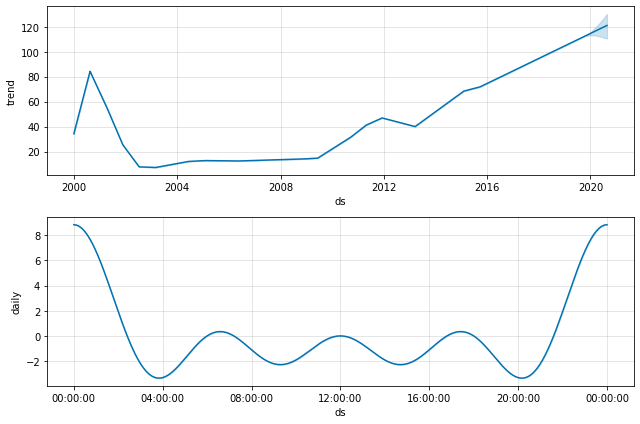

In [158]:
fig2 = m.plot_components(forecast)


**Measurement of accuracy of model:**

In [159]:
from fbprophet.diagnostics import cross_validation

In [160]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 34 forecasts with cutoffs between 2002-05-19 00:00:00 and 2018-08-23 00:00:00
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3.0\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3.0\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3.0\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.d

C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3.0\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3.0\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Local\Continuum\anaconda3.0\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\jonathanbe\AppData\Loc

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-05-20,24.187791,11.784373,36.817476,19.799999,2002-05-19
1,2002-05-21,24.133731,11.628361,37.490253,18.750000,2002-05-19
2,2002-05-22,24.079670,11.486537,36.172085,17.320000,2002-05-19
3,2002-05-23,24.025610,11.606537,37.521164,18.010000,2002-05-19
4,2002-05-24,23.971549,11.904297,36.199188,18.000000,2002-05-19


In [161]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,45.229532,6.725290,5.386813,0.131157,0.709357
1,38 days,46.079572,6.788194,5.442710,0.133051,0.704678
2,39 days,46.868218,6.846037,5.489561,0.134022,0.699314
3,40 days,47.415643,6.885902,5.520721,0.135037,0.696281
4,41 days,47.754866,6.910490,5.542579,0.135515,0.692772


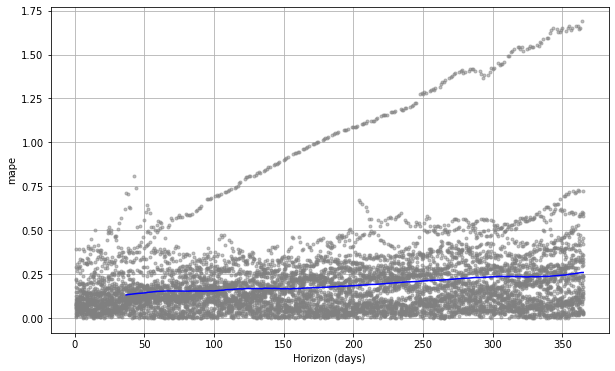

In [162]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

**Using MAPE - mean absolute percentage error, we see that the error rate is around 12% in the beginning and continues to be around 26% as time goes by**